#### Setting up the working environment on Google Colab or Kaggle
[Colab](http://colab.research.google.com/) and [Kaggle](https://www.kaggle.com/) already come with Python and a collection of the most famous Python packages installed. 
To install a given library ``x``, you simply need to run a cell with the following content:

``!pip install x`` 

<details>
<summary>If you prefer to work locally, expand this cell for a complete guide on how to configure the Python environment!</summary>
## Installing Python Packages

#### Installing via pip (for the *wise*  *nix users)
Like any other major python library, numpy can be downloaded from
the [Python Package Index](https://pypi.org/) via Python’s standard pip package manager


**Note:** you need Python and pip (https://realpython.com/what-is-pip/) already installed on your system.

```

python -m pip install --user numpy 

```

It is preferable to use the --user flag, as it prevents the need for *sudo* privileges



#### Install with Anaconda 

> (**Recommended for Windows users**)

Anaconda is a free and open-source distribution of the Python and R programming languages for scientific computing (data science, machine learning applications, large-scale data processing, predictive analytic, etc.), that aims to simplify package management and deployment. Package versions are managed by the package management system conda.

The Anaconda distribution is used by over 12 million users and includes more than 1400 popular data-science packages suitable for Windows, Linux, and MacOs.

It can be download at the following link [Anaconda](https://www.anaconda.com/distribution/).

Please download and install the Python 3.7 version and you are done!  

Anaconda allows you to easily manage and create  different *environments*.

Installing a package with conda is simple. You need to search the package you want to install at [https://anaconda.org/](https://anaconda.org/)  and just copy the command.

For instance:
```
conda install -c anaconda numpy 

```

###  Good Practice
Regardless of the way you decide to install your python distribution,
in order to have a clean python setup, you should get used to the concept of python *environment*.

**What is an Environment?**
A environment is a directory containing all the packages and dependencies required by your project.

You may want to create an environment for every project you work on.
There are two main benefits deriving by the endorsement of such behavior:

 1. It will be easier to share the project among different machines.
 2. You are reducing the risk of messing up your entire python ecosystem.
    
---
*Example*

You have one environment with NumPy 1.7 and its dependencies, and another environment with NumPy 1.6 for legacy testing. 
All the changes you made on one environment do no affect the others. So, you can keep working on different projects as they
were isolated from the others.

---

### How to create an environment
#### Non-Conda Users
First you need to install the *virtualenv* package via:
```
pip install virtualenv
```

The you issue:

```
virtualenv <name-of-the-environment>
source path/to/the/environment/bin/activate
```
From this moment forward, your work session will use this environment
as its python distribution.

This means that, whenever you call ```pip install something```
it is installed in the current active virtual environment.

In order to deactivate the environment:
```
deactivate <name-of-the-environment>
```

#### Conda Users
With conda is even simpler. 
You create an environment with the following command:

```
conda create -n <name-of-the-environment> python[=version number]
```

The you activate it with:
```
conda activate <name-of-the-environment> 
```

And install packages with:

```
conda install -n <name-of-the-environment> something
``` 
</details>

### Introduction to NumPy

In [ ]:
# Installing NumPy
# !pip install numpy

In [1]:
from IPython.display import Image
import os
import numpy as np
  
IMG_PATH = "./img"

In [2]:
'''
Let's define a utility function that will be useful later on to inspect our numpy arrays.
'''
def describe(a):
  """
  Description of the array a
  
  Parameters
  ----------
    a : numpy array
  """
  print("data:\n{}\nshape:{}\ndtype: {}".format(a, a.shape, a.dtype))

# Utility function to print horizontal rules
hrule = lambda x : "="*x

### The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which
is a fast, flexible container for large data sets in Python.

Arrays enable you to perform
mathematical operations on whole blocks of data using similar syntax to the equivalent
operations between scalar elements

In [3]:
# create a random matrix of 4x5 dimension with
# 20 points drawn from an uniform distribution 
# defined in the interval (0,10]
data = np.random.randint(0,10,20).reshape(4,5)

print(data)

print(hrule(30))
print(data+data)

print(hrule(30))
print(data*10)

[[6 6 0 4 5]
 [0 9 9 2 9]
 [3 9 9 5 4]
 [3 0 1 1 6]]
[[12 12  0  8 10]
 [ 0 18 18  4 18]
 [ 6 18 18 10  8]
 [ 6  0  2  2 12]]
[[60 60  0 40 50]
 [ 0 90 90 20 90]
 [30 90 90 50 40]
 [30  0 10 10 60]]


**Definition: ndarray**

An ndarray is a generic multidimensional container for *homogeneous* data
(all the elements must have the same type) - **They are not Python lists!**

An ndarray is associated with a *shape*, a tuple denoting the size of each dimension.

An ndarray is also associated with a *dtype*,  an object describing the data type of the array.

In [4]:
print("data: shape {}, dtype {}".format(data.shape, data.dtype))

data: shape (4, 5), dtype int64


### Creating ndarrays

The easiest way is via the **array** function. 
This function accepts any sequence-like object and returns
a new ndarray containing the data passed as input.

**Question**: Which is the dtype of data_arr?

In [5]:
data_list = [6, 7.5, 8, 0, 1]
data_arr = np.array(data_list)
print(data_arr)

[6.  7.5 8.  0.  1. ]


We can also convert nested sequences, e.g., lists of lists. 
Numpy will return a multidimensional array.


In [6]:
data2 = np.array([[1,0.2,3,4], [1,2,3,4]])
describe(data2)

data:
[[1.  0.2 3.  4. ]
 [1.  2.  3.  4. ]]
shape:(2, 4)
dtype: float64


What if the lists have different sizes?

In [7]:
data2_ = np.array([[1,2,3,4], [1,2,3,4,5]], dtype='object')
data2_

array([list([1, 2, 3, 4]), list([1, 2, 3, 4, 5])], dtype=object)

**Note** - Unless explicitly specified, np.array tries to infer the best data type
on the basis of the data passed to the function.



In [8]:
data_arr.dtype
data2_.dtype

dtype('O')

### Functions for initializing arrays

In addition to np.array, there are several other functions.

For instances

**np.zeros**. it needs the shape of the array to be created

In [9]:
print(np.zeros(10)) # create an array of 10 elements
print(hrule(30)) 
print(np.zeros((2,2))) # create a multidimensional array 2x2

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0.]
 [0. 0.]]


**np.empty** creates an array of garbage numbers

In [10]:
np.empty(15) # DO NOT USE ME!

array([0.        , 0.        , 0.4472136 , 0.0531494 , 0.18257419,
       0.4472136 , 0.2125976 , 0.36514837, 0.4472136 , 0.4783446 ,
       0.54772256, 0.4472136 , 0.85039041, 0.73029674, 0.4472136 ])

**np.arange**, it is the counterpart to the built-in range function



In [11]:
# All the number within (0,10]
# with increment 2
np.arange(0,10,2) 

array([0, 2, 4, 6, 8])

These are just an example. The following table summarize some of the most useful functions.

| Function   | Description |
|---|---|
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray |
| arange |Like the built-in range but returns an ndarray instead of a list | 
|ones, ones_like |Produce an array of all 1’s with with the same shape and dtype of the given array|
|zeros, zeros_like | Like ones but with zeros | 
| eye, identity |  Create a square N x N identity matrix |

### Data Types for ndarrays

The data type or dtype is a special object containing the information needed 
by numpy in order to interpret a chunk of memory as a particular type of data.

The numerical dtypes are named the same way: a type name,
like float or int , followed by a number indicating the number of bits per element.

The following table is a full listing of NumPy's supported data types


| Type | Type Code   | Description |
|---|---|---|
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types  |
| int16, uint16 | i2, u2|  Signed and unsigned 16-bit integer types|
| int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types|
| int64, uint64 | i8, u8|  Signed and unsigned 32-bit integer types|
| float16 | f2 | Half-precision floating point|
| float32 | f4 or f | Standard single-precision floating point. Compatible with C float |
| float64, float128 | f8 or d |  Standard double-precision floating point. Comp. with C double and Py float |
| float128 | f16 or g | Extended-precision floating point | 
| complex64, complex128, complex256 | c8, c16, c32 | Complex numbers represented by two32, 64, or 128 floats, respectively |
| bool | ? | Boolean type storing True and False values |
| object | O | Python object type |
| string_  | S|  Fixed-length string type (1 byte per character). |
|unicode_ | U | Fixed-length unicode type (number of bytes platform specific) |


**Casting**

We can cast one dtype into another by using the method astype




In [12]:
data_float = data.astype(np.float64)
describe(data_float)

data:
[[6. 6. 0. 4. 5.]
 [0. 9. 9. 2. 9.]
 [3. 9. 9. 5. 4.]
 [3. 0. 1. 1. 6.]]
shape:(4, 5)
dtype: float64


In [13]:
data_float

array([[6., 6., 0., 4., 5.],
       [0., 9., 9., 2., 9.],
       [3., 9., 9., 5., 4.],
       [3., 0., 1., 1., 6.]])

**Note**
When calling astype, numpy crates a new array, even if the new dtype is the same as the old dtype


In [16]:
describe(data.astype(np.float64))

data:
[[6. 6. 0. 4. 5.]
 [0. 9. 9. 2. 9.]
 [3. 9. 9. 5. 4.]
 [3. 0. 1. 1. 6.]]
shape:(4, 5)
dtype: float64


In [17]:
describe(data)

data:
[[6 6 0 4 5]
 [0 9 9 2 9]
 [3 9 9 5 4]
 [3 0 1 1 6]]
shape:(4, 5)
dtype: int64


## Accessing the array

### Indexing & Slicing
One-dimensional array behaves as a simple old-fashioned Python list.


In [18]:
arr = np.arange(10)

print(arr)
print(hrule(10))
print(arr[5:8]) # slice operator
print(hrule(10))

arr[0:5] = 10 # be careful
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7]
[10 10 10 10 10  5  6  7  8  9]



**Note** - numpy allows us to assign a scalar value to a slice of the array.
The value is said to be *broadcast*  over the entire selection.
 

---
**Note***. One major difference with Python lists is that the slicing operator
returns an *actual view* on the **original** array, instead of a copy of the data.

---

**What if we need a full copy of the original array?**

In [19]:
arr = np.arange(10)
print(arr)
print(hrule(10))

arr1 = arr # be careful this is not a copy
arr1[0] = -10
print(arr)
print(hrule(10))
arr_ = arr[0:5].copy()
arr_[0] = -100
print(arr) # it remains the same as before
print(hrule(10))

describe(arr_)


[0 1 2 3 4 5 6 7 8 9]
[-10   1   2   3   4   5   6   7   8   9]
[-10   1   2   3   4   5   6   7   8   9]
data:
[-100    1    2    3    4]
shape:(5,)
dtype: int64


Indexing in multidimensional array is straightforward.
You can specify and index for each available dimension.



In [20]:
print(data)
print(hrule(10))

print(data[0,1])
print(hrule(10))
print(data[0, :])  # `:` means: "give me the entire axis!"
print(hrule(10))
print(data[:, 1:4])

[[6 6 0 4 5]
 [0 9 9 2 9]
 [3 9 9 5 4]
 [3 0 1 1 6]]
6
[6 6 0 4 5]
[[6 0 4]
 [9 9 2]
 [9 9 5]
 [0 1 1]]


Actually, with multidimensional array we can avoid to specify an index for every possible axes.

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) # 2 x 2 x 3 array
print(arr3d)
print(hrule(10))

describe(arr3d[0])  # take the first element on the first dimension (2x3) array
print(hrule(10))

# take the first element on the second axis with respect to the entire first axis
describe(arr3d[:,0]) 

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
data:
[[1 2 3]
 [4 5 6]]
shape:(2, 3)
dtype: int64
data:
[[1 2 3]
 [7 8 9]]
shape:(2, 3)
dtype: int64


**Exercise** - Get familiar with array indexing



In [ ]:
'''
Give me the first (2x3) array
  
  Result (wrt arr3d)
  ------
    [
      [1 2 3],
      [4, 5, 6]
    ], shape(2,3)
    
'''
describe(
# your solution here
)
print(hrule(20))


'''
Result (wrt arr3d)
------
  [1 2 3], shape(3,)
'''
describe(
# your solution here
)
print(hrule(20))

''' 
Result (wrt arr3d)
------
  [
    [1 2 3 ]
    [7 8 9 ]
  ], shape (2,3)
 
'''
describe(
#your solution here
)
print(hrule(20))

'''
Result (wrt arr3d)
------
  [
    [4 5 6]
    [10 11 12]
  ], shape (2,3)
'''
describe(
# your solution here
)
print(hrule(20))



''' 
Result (wrt arr3d)
------
  [
    [1 4],
    [7 10]
  ], shape (2,2)
'''
describe(
# your solution here
)
print(hrule(20))


''' 
Result 
------
  [
    [0 2 4],
    [6 8 10]
  ], shape (2,3)
'''
describe(
# your solution here
)
print(hrule(20))


---

### Boolean Indexing
This is a powerful tool, since it allows us to execute (kind of) queries on the array.


In [22]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4) # normally distributed data

mask = names == "Bob" # it return an array of bool (useful as a mask)
print(mask)
names[mask]

[ True False False  True False False False]


array(['Bob', 'Bob'], dtype='<U4')

In [23]:
(names=="Bob") | (names=="Will")

array([ True, False,  True,  True,  True, False, False])

We can perform an element-wise comparison 
between the name "Bob" and the names contained in the array.
In this way we are  exploiting the *vectorization* capability of numpy.

We can also make rather complex logical expressions, e.g.:


```
  mask = (names=="Bob") | (names == "Will")
```

---
**Tip**:

As a general rule-of-thumb, it is always preferable to avoid the for-loop and let numpy
doing the hard work, since it leads to a cleaner and more efficient code.

In [24]:
def forSearch(toSearch, sequence):
    for e in sequence:
        if e == toSearch:
            return True
    return False

randomData = np.random.randint(0,500,1000)
x = 250

forTime = %timeit -o forSearch(x,randomData)
numTime = %timeit -o np.any(randomData==x)
print(forTime.best/numTime.best)

41.2 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.11 µs ± 6.57 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.52732748387766


---

**Exercise 1**
Create a vector from the  *names* array which contains all the values but "Bob"


In [26]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [25]:
names[names != "Bob"]

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [31]:
print(names)
np.argwhere(names=="Bob").ravel()

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


array([0, 3])

**Exercise** Set all the negative values to zero (in-place)

In [36]:
data = np.random.randint(-10, 10,25).reshape(5,5)

In [37]:
data

array([[ -1,  -4,   1,  -4,   8],
       [ -5,   0,   9,  -6,  -5],
       [ -9,   7,  -1, -10,  -2],
       [  1,   3,   4,  -6,  -1],
       [  3,   0,   0,  -1,  -5]])

In [38]:
data < 0

array([[ True,  True, False,  True, False],
       [ True, False, False,  True,  True],
       [ True, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True]])

In [40]:
data[data < 0] = 0
describe(data)

data:
[[0 0 1 0 8]
 [0 0 9 0 0]
 [0 7 0 0 0]
 [1 3 4 0 0]
 [3 0 0 0 0]]
shape:(5, 5)
dtype: int64


#### Fancy Indexing 
Fancy indexing is a term adopted in NumPy to describe indexing via integer arrays



In [41]:
arr = np.zeros((8,4))
print(arr)
print(hrule(20))
for i in range(8):
  arr[i] = i
print(arr)
print(hrule(20))

# select a subset of rows the 
# exact same order defined inside the list
subset = arr[[1,2,2,3]] 
describe(subset)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
data:
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]
shape:(4, 4)
dtype: float64


Fancy indexing with two arrays


In [42]:
data = np.arange(4*8).reshape(8,4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [43]:
data_ = data[[1,5,7,2], [0,3,1,2]]
print(data_)


[ 4 23 29 10]


In [ ]:
# data_ contains the values with index
indexes = [(u,v) for u,v in  zip([1,5,7,2], [0,3,1,2])]
print(indexes)
print([data[u,v] for u,v in indexes])

---
#### Summary




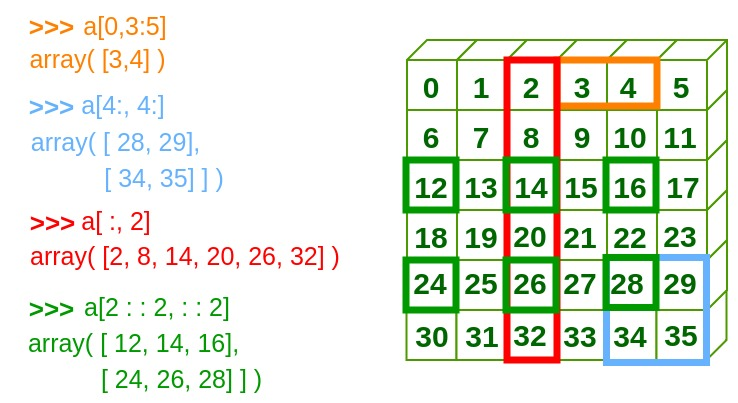

In [44]:
Image(os.path.join(IMG_PATH, "slicing.jpg"), width=500)

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping which similarly returns a view on the underlying
data without copying anything. Arrays have the transpose method and also
the special T attribute

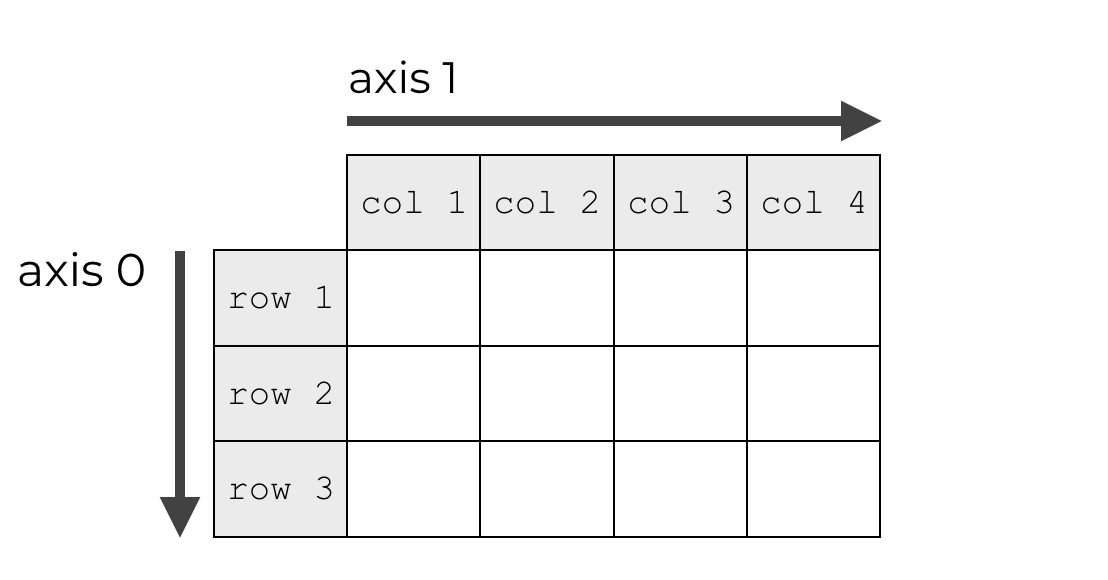

In [45]:
Image(os.path.join(IMG_PATH, "axis.png"), width=500)

In [46]:
arr = np.arange(15).reshape((3, 5))
describe(arr)
print(hrule(10))
describe(arr.T)


data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape:(3, 5)
dtype: int64
data:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
shape:(5, 3)
dtype: int64


For higher dimensional arrays, ```transpose``` will accept a tuple of axis numbers to permute
the axes (for extra mind bending):

In [47]:
arr = np.arange(16).reshape((2, 2, 4))
describe(arr)

print(hrule(20))
arr_ = arr.reshape(4,4)
describe(arr_)

data:
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
shape:(2, 2, 4)
dtype: int64
data:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
shape:(4, 4)
dtype: int64


In [48]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [49]:
arr.transpose((0,1,2))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [50]:
print(hrule(20))
arr = arr.transpose((1,0,2))
describe(arr)

data:
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
shape:(2, 2, 4)
dtype: int64


Simple transposing with .T is just a special case of swapping axes. ndarray has the
method swap axes which takes a pair of axis numbers:

In [51]:
arr = np.arange(16).reshape((2, 2, 4))
describe(arr)
print(hrule(20))

arr_ = arr.swapaxes(1,2)
describe(arr_)


data:
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
shape:(2, 2, 4)
dtype: int64
data:
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]
shape:(2, 4, 2)
dtype: int64


### Universal Functions: Fast Element-wise Array Functions

An universal function, or ufunc, is a function that performs a certain operation 
upon every element in an array container.


In [52]:
arr = np.power(np.arange(10), 2) # param1: scalar or array, param2: exp
describe(np.sqrt(arr)) 

data:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
shape:(10,)
dtype: float64


These are regarded as unary ufuncs. Others, such as add or maximum , take 2 arrays
(thus, binary ufuncs) and return a single array as the result:

In [53]:
x,y = np.random.randint(0, 10, 10), np.random.randint(0, 10, 10)

print(x)
print(y)

[2 8 7 4 4 0 8 2 6 6]
[8 2 0 9 3 7 9 0 9 1]


In [56]:
maximum = np.maximum(x,y)  # element-wise max 
minimum = np.minimum(x,y)  # element-wise min

print(maximum)  
print(hrule(20))
print(minimum)

[8 8 7 9 4 7 9 2 9 6]
[2 2 0 4 3 0 8 0 6 1]



There are several functions that perform element-wise operation over an array.
---

*Unary Function*

| Function  | Description |
|---|---|
| abs |  Compute the absolute value element-wise for integer, floating point, or complex values. |
| sqrt | Compute the square root of each element. |
|square | Compute the square of each element. |
|exp | Compute the exponent e x of each element |
|log, log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively |
|sign | Compute the sign of each element: 1 (positive), 0 (zero), or -1 (negative) |
|ceil | Compute the ceiling of each element, i.e. the smallest integer greater than or equal to each element |
|floor | Compute the floor of each element, i.e. the largest integer less than or equal to each element |
|rint | Round elements to the nearest integer, preserving the dtype |
|modf | Return fractional and integral parts of array as separate array |
|isnan | Return boolean array indicating whether each value is NaN (Not a Number) |
|isfinite, isinf | Return boolean array indicating whether each element is finite (non- inf , non- NaN ) or infinite, respectively |
|cos, cosh, sin, sinh,tan, tanh | Regular and hyperbolic trigonometric functions |
|arccos, arccosh, arcsin|  * | 
| arcsinh, arctan, arctanh | Inverse trigonometric functions |
| logical_not | Compute truth value of not x element-wise. Equivalent to -arr |



---

*Binary Function*


| Function  | Description |
|---|---|
| add | Add corresponding elements in arrays |
|subtract | Subtract elements in second array from first array |
|multiply | Multiply array elements |
|divide, floor_divide | Divide or floor divide (truncating the remainder) |
|power | Raise elements in first array to powers indicated in second array |
|maximum, fmax | Element-wise maximum. fmax ignores NaN |
|minimum, fmin | Element-wise minimum. fmin ignores NaN |
|mod  | Element-wise modulus (remainder of division) |
|copysign | Copy sign of values in second argument to values in first argument |
|greater, greater_equal | Perform element-wise comparison, yielding boolean array (>, >=, <, <=, ==, !=) |
|less, less_equal, equal, not_equal | * |

---
**TIP**

You should always prefer ufuncs over classic Python for-loops,
as they are usually faster.




In [55]:
def power(l):
    pow = lambda x : x**2
    for i,e in enumerate(l):
        l[i] = pow(e)
       
a = np.random.randint(0,5,1000)
forTime = %timeit -o power(a)
numTime = %timeit -o np.power(a,2)

print(forTime.best/numTime.best)

132 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.68 µs ± 7.97 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
77.07406434648749


### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y.
Suppose we had a boolean array and two arrays of values:

In [57]:
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

**Exercise**
Create  a list $L = [l_1, l_2 \dots l_n]$ such that
$$
 l_i = \left\{\begin{array}{lr}
        x_i & \text{if } cond_i \text{ is True} \\
        y_i & \text{otherwise } 
        \end{array}\right.
$$

In [58]:
l = [u if cond[i] else v for i,(u,v) in enumerate(zip(x,y))]
print(l)

[1.1, 2.2, 1.3, 1.4, 2.5]


Now, let's do the same thing but in the NumPy way!



--- 
**numpy.where** 
is a vectorized version of the ternary expression 

```
 if (cond) then x else y
```

Run the following cell for additional information


In [59]:
?np.where

Call signature:  np.where(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function where>
Docstring:      
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes


In [60]:
print(cond)
print(x)
print(y)

[ True False  True  True False]
[1.1 1.2 1.3 1.4 1.5]
[2.1 2.2 2.3 2.4 2.5]


**Exercise** Solve the above problem with *numpy*

In [61]:
np.where(cond, x, y)

array([1.1, 2.2, 1.3, 1.4, 2.5])

**Exercise** Set all the values of *arr* to 2 if they are grater than 0 or -2 otherwise

In [62]:
arr = np.random.randint(-5,5, 16).reshape(4,4)
describe(arr)

data:
[[ 2 -4  2 -3]
 [ 4  2 -2  4]
 [-2  3  3  4]
 [-5 -1  2  3]]
shape:(4, 4)
dtype: int64


In [63]:
np.where(arr>0,2,-2)

array([[ 2, -2,  2, -2],
       [ 2,  2, -2,  2],
       [-2,  2,  2,  2],
       [-2, -2,  2,  2]])

**Additional notes on numpy.where**


The arrays passed to np.where can be more than just equal sizes array or scalars.
With some cleverness you can use where to express more complicated logic; consider
this example where I have two boolean arrays, **cond1** and **cond2** , and wish to assign a
different value for each of the 4 possible pairs of boolean values.

Instead of writing this messy code
```
result = []
for i in range(n):
  if cond1[i] and cond2[i]:
    result.append(0)
  elif cond1[i]:
    result.append(1)
  elif cond2[i]:
    result.append(2)
  else:
    result.append(3)
```

I can write this other (messy) code:

```
np.where(cond1 & cond2, 0,
              np.where(cond1, 1, 
                          np.where(cond2, 2, 3))
```

---


### Mathematical and Statistical Methods

A set of mathematical functions which compute statistics about an entire array or about
the data along an axis are accessible as array methods.


| Function  | Description |
|---|---|
| sum |  - |
|mean |  - |
| std, var | Standard deviation and variance |
|min, max |  - | 
|argmin, argmax | - |
|cumsum | Cumulative sum of elements starting from 0  |
|cumprod | Cumulative product of elements starting from 1 |

**Exercise** Get familiar with these methods. Compute each one of them along axis 1.


In [64]:
arr = np.random.randn(5, 4) # normally-distributed data
describe(arr)

data:
[[-0.42276522  0.05946024  0.6003618  -0.35398993]
 [-1.29321617 -3.59944646 -0.78579621 -0.32777082]
 [-1.7752387   0.55739718 -0.75695938 -0.54274507]
 [ 0.57644829  0.0048513   0.88510365 -0.98590866]
 [-1.21494058  0.86638687  1.70227522  1.76931333]]
shape:(5, 4)
dtype: float64


In [65]:
print(arr.sum())
print(arr.sum(0))
print(arr.mean(1))

-5.037179317266125
[-4.12971237 -2.11135088  1.64498509 -0.44110115]
[-0.02923328 -1.50155742 -0.62938649  0.12012364  0.78075871]


#### Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. Probably the most
commonly used one is **np.unique** , which returns the sorted unique values in an array:

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
describe(np.unique(names))

data:
['Bob' 'Joe' 'Will']
shape:(3,)
dtype: <U4


### Linear Algebra 


|Function | Description |
| --- | --- |
|diag | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array |
|dot | Matrix multiplication  |
|trace | Compute the sum of the diagonal elements |
|det | Compute the matrix determinant |
|eig | Compute the eigenvalues and eigenvectors of a square matrix |
|inv | Compute the inverse of a square matrix |
|pinv | Compute the Moore-Penrose pseudo-inverse inverse of a square matrix |
|qr | Compute the QR decomposition |
|svd | Compute the singular value decomposition (SVD) |
|solve | Solve the linear system Ax = b for x, where A is a square matrix |
| lstsq | Compute the least-squares solution to y = Xb |




---

### Random Number Generation
The numpy.random module supplements the built-in Python random with functions for
efficiently generating entire arrays from random values drawn from a number of 
probability distributions.

You should prefer numpy.random over built-in random function since it is 
order of magnitude faster.

In [67]:
N = 1000
%timeit samples = [np.random.normal(0, 1) for _ in range(N)]


460 µs ± 8.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [68]:
%timeit np.random.normal(size=N)

15.6 µs ± 94.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Advanced Array Manipulation




## Further technical details on ndarray object internals

As you’ve
seen, the data type, or dtype, determines how the data is interpreted as being floating
point, integer, boolean, or any of the other types we’ve been looking at.

Part of what makes ndarray powerful is that every array object is a strided view on a
block of data.

You might wonder, for example, how the array view arr[::2, ::-1] does
not copy any data. 
Simply put, the ndarray is more than just a chunk of memory and
a dtype; it also has striding information which enables the array to move through
memory with varying step sizes.

More precisely, the ndarray internally consists of the
following:
 * A pointer to data, that is a block of system memory
* The data type or dtype
* A tuple indicating the array’s shape
* A tuple of strides, integers indicating the number of bytes to “step” in order to
advance one element along a dimension; 
For example, a typical 3 x 4 x 5 array of float64 (8-byte) values has strides (160 (4x5x8byte), 40 (5x8byte) , 8 (1x8byte) )

While it is rare that a typical NumPy user would be interested in the array strides,
they are the critical ingredient in constructing copy-less array views. 

Strides can
even be negative which enables an array to move backward through memory, which
would be the case in a slice like obj[::-1] or obj[:, ::-1] .




In [ ]:
Image(os.path.join(IMG_PATH, 'ndarray.png'), width=500)

In [ ]:
x = np.array([[0, 1, 2, 3, 4],
              [5, 6, 7, 8, 9]], dtype=np.int32)
x.strides

To move to the next row (first dimension): 20 bytes (which is 5 elements × 4 bytes per element)

To move to the next column (second dimension): 4 bytes (which is just the size of one int32)

### Advanced Array Manipulation
There are many ways to work with arrays beyond fancy indexing, slicing, and boolean
sub-setting. While much of the heavy lifting for data analysis applications is handled by
higher level functions in Pandas (more on this soon), you may at some point need to write a data algorithm
that is not found in one of the existing libraries.
#### Reshaping Arrays
Given what we know about NumPy arrays, it should come as little surprise that you
can convert an array from one shape to another without copying any data. To do this,
pass a tuple indicating the new shape to the reshape array instance method. For exam-
example, suppose we had a one-dimensional array of values that we wished to rearrange into
a matrix:

In [ ]:
arr = np.arange(8)
arr = arr.reshape((4,2)) 
describe(arr)

One of the input shape dimensions can be -1, in which case the value used for that
dimension will be inferred from the data

In [ ]:
arr = arr.reshape(-1,2,2)
describe(arr)

If we want to unroll a multi-dimensional array into a one-dimensional array, we can use
two methods:

*flatten*  and  *ravel* 

In [ ]:
describe(arr.flatten()) # returns a copy
print(hrule(20))

print("original shape = {}".format(arr.shape))

print(hrule(20))
describe(arr.ravel()) # returns a view

#### Concatenating and Splitting Arrays
numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and it joins them together
along the given axis.



In [ ]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
data = np.concatenate([arr1, arr2], axis=0)
describe(data)
print(hrule(20))
data = np.concatenate([arr1, arr2], axis=1)
describe(data)


There are some convenience functions, like vstack and hstack , for common kinds of
concatenation. The above operations could have been expressed as:


In [ ]:
data = np.vstack([arr1, arr2])
describe(data)
print(hrule(20))
data = np.hstack([arr1, arr2])
describe(data)

**split** slices apart an array into multiple arrays along an axis:

In [ ]:
data = np.arange(10).reshape(5,2)
describe(data)
print(hrule(20))

f,s,t = np.split(data, [1, 3]) # split at position 1 and 3 (the remaining elements will go into t)

print("First Split")
describe(f)
print(hrule(20))

print("Second Split")
describe(s)
print(hrule(20))

print("Third Split")
describe(t)

Other useful functions

| Function  | Description |
|---|---|
| concatenate | Most general function, concatenates collection of arrays along one axis   |
| vstack, row_stack  |  Stack arrays row-wise (along axis 0)  |
| hstack | Stack arrays column-wise (along axis 1)  |
| column_stack |Like hstack, but converts 1D arrays to 2D column vectors first |
| dstack |Stack arrays “depth"-wise (along axis 2) |
| split |Split array at passed locations along a particular axis |
| hsplit / vsplit / dsplit |Convenience functions for splitting on axis 0, 1, and 2, respectively |

## Broadcasting
Broadcasting describes how arithmetic works between arrays of different shapes. It is
a very powerful feature, but one that can be easily misunderstood, even by experienced
users. 

The simplest example of broadcasting occurs when combining a scalar value
with an array:

In [ ]:
arr = np.arange(5)
arr = arr*4
describe(arr)

The scalar 4 has been broadcast to all of the other elements in the multiplication operation.

Here, there is a another example where  a multi-dimensional array and a one-dimensional
array are involved.

We want to subtract the column means by each column of a 2-dimensional array:

In [ ]:
arr = np.arange(12).reshape(4,3)
mean = arr.mean(0)
describe(arr)
print(hrule(20))

In [ ]:
describe(mean)
print(hrule(20))

In [ ]:
sub = arr - mean
describe(sub)

This is what happened:


In [ ]:
Image(os.path.join(IMG_PATH, 'broadcasting.png'), width=500)

---
**The Broadcasting Rule**

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

1. **R1**. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side

2. **R2**. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape

3. **R3**. If in any dimension the sizes disagree and neither is equal to 1, an error is raised

---

**Case 1**


In [ ]:
M = np.ones((2,3))
a = np.arange(3)

describe(M)
print(hrule(20))

describe(a)


M and a have different dimensions, therefore **R1** applies. The shape of the
of the one with fewer dimensions is *padded* with ones on its leading (left) side.

The shape change as:

```
  M.shape = (2,3) -> (2, 3)
  a.shape = (3,) -> (1, 3)
```
Then, since the first dimension disagree, **R2** applies, thus NumPy stretches this dimension to match.

```
M.shape = (2,3) -> (2,3) -> (2,3)
a.shape = (3,) -> (1,3) -> (2, 3)
```
Now the shape of the two arrays matches and the operation can be performed.

This is what happened to array ```a```




In [ ]:
np.repeat(np.arange(3).reshape(1,3),3,0)

In [ ]:
Image(os.path.join(IMG_PATH, 'broadcasting_.png'), width=500)

In [ ]:
describe(M+a)

---
**Case 2**

Let's see an example where both arrays need to be broadcast


In [ ]:
a = np.arange(3).reshape(3,1)
b = np.arange(3)

describe(a)
print(hrule(20))

describe(b)


In this case **R1** applies, therefore the shape of *b* is padded.

```
a.shape = (3, 1) -> (3, 1)
b.shape = (3, )  -> (1, 3)
```
The **R2** applies to both the arrays:

```
a.shape = (3, 1) -> (3, 1) -> (3, 3)
b.shape = (3, ) -> (1, 3) -> (3, 3)
```
Because the result matches, these shapes are compatible. 
We can see this here:

In [ ]:
describe(a+b)

---
**Case 3**

Now let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3,2))
a = np.arange(3)

describe(M)
print(hrule(20))

describe(a)
print(hrule(20))

This is just a slightly different situation than in the first example: the matrix M is transposed.
Again, **R1** applies on array *a*. Then by **R2** the first dimension of *a* is stretched
to match that of *M*.

```
M.shape = (3, 2) -> (3, 2) -> (3, 2)
a.shape = (3,)   -> (1, 3) -> (3, 3)  
```

Then **R3** is triggered, the array are compatible and a ValueError exception is raised


In [ ]:
M+a

---
## Conclusions

This is the end of this section.
If you want to keep practicing you can follow this link:
[Numpy 100](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)